<h2 id="Contents">Contents<a href="#Contents"></a></h2>
        <ol>
        <li><a class="" href="#Convolution-Layer">Convolution Layer</a></li>
<ol></ol><li><a class="" href="#The-Convolution-Operation">The Convolution Operation</a></li>
<ol><li><a class="" href="#Padding">Padding</a></li>
<li><a class="" href="#Stride">Stride</a></li>
<li><a class="" href="#Output-Shape">Output Shape</a></li>
</ol><li><a class="" href="#Pooling-Layer">Pooling Layer</a></li>
<ol><li><a class="" href="#Max-Pooling">Max Pooling</a></li>
<li><a class="" href="#Average-Pooling">Average Pooling</a></li>
</ol><li><a class="" href="#A-Typical-Convolutional-Neural-Network">A Typical Convolutional Neural Network</a></li>
</ol>

# Convolution Layer

The convolutional neural network, or CNN for short, is a specialized type of neural network model designed for working with two-dimensional image data, although they can be used with one-dimensional and three-dimensional data.

Central to the convolutional neural network is the convolutional layer that gives the network its name. This layer performs an operation called a “convolution“.

The fundamental difference between a densely connected layer and a convolution layer is this: `Dense` layers learn global patterns in their input feature space (for example, for a MNIST digit, patterns involving all pixels), whereas convolution layers learn local patterns: in the case of images, patterns found in small 2D windows of the inputs.

![](images/0501.png)

This key characteristic gives convnets two interesting properties:
- The patterns they learn are translation invariant: After learning a certain pattern in the lower-right corner of a picture, a convnet can recognize it anywhere: for example, in the upper-left corner. A densely connected network would have to learn the pattern anew if it appeared at a new location.
- They can learn spatial hierarchies of patterns: A first convolution layer will learn small local patterns such as edges, a second convolution layer will learn larger patterns made of the features of the first layers, and so on. This allows convnets to efficiently learn increasingly complex and abstract visual concepts.

![](images/0502.png)

## The Convolution Operation

In the context of a convolutional neural network, a convolution is a linear operation that involves the multiplication of a set of weights with the input, much like a traditional neural network. Given that the technique was designed for two-dimensional input, the multiplication is performed between an array of input data and a two-dimensional array of weights, called a *filter* or a *kernel*.

Convolutions operate over 3D tensors, called feature maps, with two spatial axes (height and width) as well as a depth axis (also called the channels axis). The convolution operation extracts patches from its input feature map and applies the same transformation to all of these patches, producing an output feature map. This output feature map is still a 3D tensor: it has a width and a height. Its depth can be arbitrary, because the output depth is a parameter of the layer, and the different channels in that depth axis no longer stand for specific colors as in RGB input; rather, they stand for filters.

Convolutions are defined by two key parameters:
- *Size of the patches extracted from the inputs*—These are typically 3 × 3 or 5 × 5. In the example, they were 3 × 3, which is a common choice.
  ![](images/0503.png)
- *Depth of the output feature map*—The number of filters computed by the convolution. The example started with a depth of 32 and ended with a depth of 64.

A convolution works by sliding these windows of size 3 × 3 or 5 × 5 over the 3D input feature map, stopping at every possible location, and extracting the 3D patch of surrounding features (shape `(window_height, window_width, input_depth)`). Each such 3D patch is then transformed (via a tensor product with the same learned weight matrix, called the convolution kernel) into a 1D vector of shape `(output_depth,)`. All of these vectors are then spatially reassembled into a 3D output map of shape `(height, width, output_depth)`. Every spatial location in the output feature map corresponds to the same location in the input feature map (for example, the lower-right corner of the output contains information about the lower-right corner of the input). For instance, with 3 × 3 windows, the vector `output[i, j, :]` comes from the 3D patch `input[i-1:i+1, j-1:j+1, :]`

![](images/0504.png)

### Padding

Consider a 5 × 5 feature map (25 tiles total). There are only 9 tiles around which you can center a 3 × 3 window, forming a 3 × 3 grid. Hence, the output feature map will be 3 × 3. It shrinks a little: by exactly two tiles alongside each dimension, in this case. If you want to get an output feature map with the same spatial dimensions as the input, you can use padding. Padding consists of adding an appropriate number of rows and columns on each side of the input feature map so as to make it possible to fit center convolution windows around every input tile.

![](images/0505.png)

In Conv2D layers, padding is configurable via the padding argument, which takes two values: "valid", which means no padding (only valid window locations will be used); and "same", which means “pad in such a way as to have an output with the same width and height as the input.”

![](images/0506.png)

### Stride

The distance between two successive windows is a parameter of the convolution, called its stride, which defaults to 1. It’s possible to have strided convolutions: convolutions with a stride higher than 1. You can see the patches extracted by a 3 × 3 convolution with stride 2 over a 5 × 5 input (without padding).

![](images/0507.png)

### Output Shape

If the input is a $n \times m$ feature map and we are using a kernel of size $f \times f$, with padding p and stride s then the output shape will be
$$
\lfloor {\frac{(n+2p-f)}{s}+1} \rfloor \times \lfloor {\frac{(n+2p-f)}{s}+1} \rfloor
$$

If we use
$$
n_H^{[l]} = \text{height}\\
n_W^{[l]} = \text{width}\\
f^{[l]} = \text{filter size}\\
p^{[l]} = \text{padding}\\
s^{[l]} = \text{stride}\\
n_c^{[l]} = \text{number of channels}
$$
for the $l$-th layer, then the input shape for a convolutional layer will be:
$$
n_H^{[l-1]}\times n_W^{[l-1]}\times n_c^{[l-1]}
$$ and
$$
n_H^{[l]}\times n_W^{[l]}\times n_c^{[l]}
$$
Where $n_H^{[l]}$ and $n_W^{[l]}$ will be calculated by the above formula.

Furthermore, total number of weight parameters of the $l$-th layer will be:
$$
n_c^{[l-1]} \times n_c^{[l]} \times f^{[l]} \times f^{[l]}
$$

# Pooling Layer

Pooling layers are used as the purpose of gradually decreasing the spatial extent of the network, which reduces the parameters and overall computation of the network.

The pooling layers down-sample the previous layers feature map.

Pooling layers follow a sequence of one or more convolutional layers and are intended to consolidate the features learned and expressed in the previous layers feature map. As such, pooling may be consider a technique to compress or generalize feature representations and generally reduce the overfitting of the training data by the model.

## Max Pooling

Max pooling consists of extracting windows from the input feature maps and outputting the max value of each channel. It’s conceptually similar to convolution, except that instead of transforming local patches via a learned linear transformation (the convolution kernel), they’re transformed via a hardcoded max tensor operation.

![](images/0508.png)

## Average Pooling

This is similar to max pooling, except that the max value is replaced by the average value of all the pixels in the window.

> The Pooling layers don't have any parameters to learn.

# A Typical Convolutional Neural Network

A typical convolutional neural network consists of a sequence of convolutional layers, followed by pooling layers and finally some fully-connected layer.

![](images/0509.jpeg)

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.utils import plot_model

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

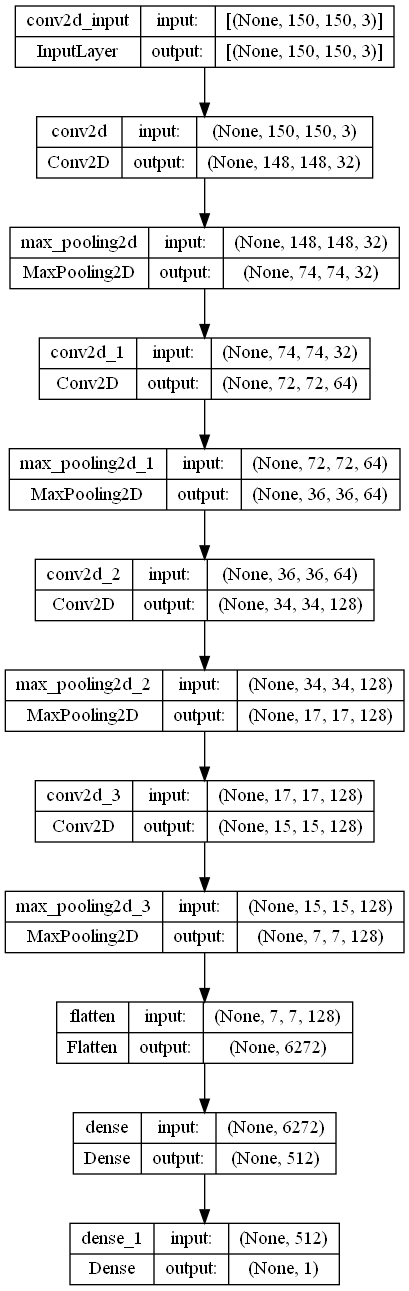

In [3]:
plot_model(model, show_shapes=True)